In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#checking size of dataset
train.shape

(42000, 785)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
#finding number of null values in a column
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
train.describe(include = "all")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


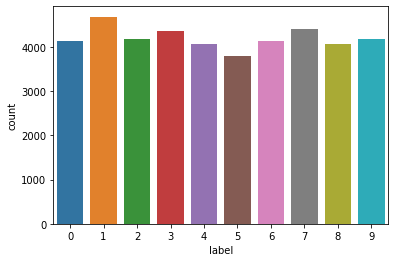

In [7]:
#checking the occurence of each number
sns.countplot(train['label'])

In [8]:
# splitting the training data into x and y
y = train['label']
x = train.drop(columns = 'label')

In [9]:
#normalizing train data
x = x/255.0


In [10]:
# importing library
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X = scale(x)


In [11]:
# spliting data into train test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7,random_state=10)

In [12]:
X_train.shape

(29399, 784)

In [13]:
X_test.shape

(12600, 784)

In [14]:
from sklearn.svm import SVC

In [16]:
model = SVC()
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn import metrics

print("accuracy : ", metrics.accuracy_score(Y_test,y_pred))
print(metrics.confusion_matrix(Y_test,y_pred))

accuracy :  0.9545238095238096
[[1169    0    3    1    0    0    5    5    5    0]
 [   0 1390    6    3    3    0    1    5    5    0]
 [   3    3 1203    9    5    1    7   19    9    1]
 [   1    2   17 1263    1   12    1   23    9    2]
 [   1    3   14    0 1167    2    8    7    2   14]
 [   0    3    2   19    4 1087   11   10    9    4]
 [  11    1    5    0    2    7 1174   15    4    0]
 [   2    9    5    3   11    1    1 1280    1   17]
 [   4   14   11   19    7   12    3   10 1127   10]
 [   2    3    4   22   22    1    1   46    7 1167]]


In [19]:
#tunning the model
hyper_params = [{'gamma':[1e-3,1e-4],'C':[5,10]}]

tunned_model = GridSearchCV(SVC(),param_grid = hyper_params, scoring = 'accuracy', cv = 5)

#fitting model
tunned_model.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [5, 10], 'gamma': [0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [20]:
score  = tunned_model.best_score_
parameter = tunned_model.best_params_
print("score: ",score,"parameter:",parameter)

score:  0.9623796727779856 parameter: {'C': 10, 'gamma': 0.001}


In [30]:
final_model = SVC(C=10, gamma=0.001, kernel="rbf")
final_model.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = final_model.predict(X_test)

In [32]:
print("accuracy : ", metrics.accuracy_score(Y_test,y_pred))
print(metrics.confusion_matrix(Y_test,y_pred))

accuracy :  0.9632539682539683
[[1166    0    3    1    0    1    6    5    4    2]
 [   0 1394    5    2    2    0    1    5    4    0]
 [   4    3 1214    7    5    2    4   14    7    0]
 [   2    0   10 1274    1   16    1   17    7    3]
 [   1    2   12    0 1176    1    6    6    2   12]
 [   0    2    1   15    1 1098    9    9   13    1]
 [   8    1    3    0    2    4 1187   12    2    0]
 [   2    7    8    4   12    1    1 1287    1    7]
 [   5   10   11   13    8    9    4    7 1145    5]
 [   2    3    3   14   21    1    1   30    4 1196]]


In [33]:
#importing test dataset
test = pd.read_csv('test.csv')

In [34]:
test.shape

(28000, 784)

In [35]:
test_x = test/255.0

In [36]:
test_scale = scale(test_x)

In [37]:
#validation 
test_pred = final_model.predict(test_scale)

In [39]:
sample = pd.read_csv("sample_submission.csv")
sample.head()


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [40]:
print("accuracy : ", metrics.accuracy_score(sample['Label'],test_pred))

accuracy :  0.09914285714285714
